<a href="https://colab.research.google.com/github/osh9149/2023_DataScience/blob/main/%EC%9D%B4%EC%83%81%EA%B8%B0%ED%9B%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_(%EC%8B%A4%EC%8A%B5%EC%9A%A9)_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <3> ⛅ 기온 데이터

"기온이 상승하고 있다는 게 사실일까?"

### 🚩 파일 다운로드 [>> 클릭](https://docs.google.com/spreadsheets/d/1OpxJCGHbaaI5z7ZvoJ0akB1WEzEAb6il/edit?usp=sharing&ouid=103052257053331330495&rtpof=true&sd=true)

[출처 - 기상자료개방포털, 기후통계분석](https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70)

# 0. 한글폰트 설정


1️⃣   한글 폰트 코드 실행
```
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
```


In [ ]:
# 셀1- 한글 폰트 설정




Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,518 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 129824 files and direc


2️⃣ **런타임 - 런타임 다시시작**

```
import os
os.kill(os.getpid(), 9)
```

In [ ]:
# 셀2-런타임 다시시작





3️⃣  **글꼴 지정 명령어**
```
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
```

In [ ]:
# 셀3







# 1. 파일 업로드

```
from google.colab import files
uploaded = files.upload()
```

In [ ]:
#셀4




Saving 우리나라 기후 데이터.xlsx to 우리나라 기후 데이터.xlsx


### csv 파일을 읽어서 DataFrame으로 변환하기

```
import pandas as pd

data = pd.read_excel('파일 이름')
data = pd.read_csv('파일 이름', encoding='cp949')
```



In [ ]:
#셀5




In [ ]:
# 데이터의 기본정보 출력






,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4
...,...,...,...,...,...
41798,2023-05-14,108,18.1,12.9,23.8
41799,2023-05-15,108,20.6,12.8,27.9
41800,2023-05-16,108,24.0,17.2,31.2
41801,2023-05-17,108,23.5,18.6,28.7


Nan이란 Not a number의 약자로 0/0처럼 수학적으로 정의가 되지 않는 값

```
# 결측치(Nan)가 하나라도 있는 행을 제거
데이터프레임.dropna(axis='rows')

# 결측치(Nan)가 하나라도 있는 열을 제거
데이터프레임.dropna(axis='columns')  

data=data.dropna(axis='rows')
```



In [ ]:
# 결측치가 하나라도 있는 행을 모두 제거



#### 데이터 기본정보 파악하기  
```
data.info
```

<bound method DataFrame.info of               날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
0     1907-10-01  108     13.5      7.9     20.7
1     1907-10-02  108     16.2      7.9     22.0
2     1907-10-03  108     16.2     13.1     21.3
3     1907-10-04  108     16.5     11.2     22.0
4     1907-10-05  108     17.6     10.9     25.4
...          ...  ...      ...      ...      ...
41798 2023-05-14  108     18.1     12.9     23.8
41799 2023-05-15  108     20.6     12.8     27.9
41800 2023-05-16  108     24.0     17.2     31.2
41801 2023-05-17  108     23.5     18.6     28.7
41802 2023-05-18  108     21.2     18.8     27.6

[41043 rows x 5 columns]>

#### Q. 날짜의 데이터타입?
```
data.describe()
```

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,41043.0,41043.000000,41043.000000,41043.000000
mean,108.0,11.759379,7.467005,16.764291
std,0.0,10.654117,10.880349,10.971717
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.700000,-1.400000,7.300000
50%,108.0,12.900000,8.000000,18.600000
75%,108.0,21.200000,17.100000,26.300000
max,108.0,33.700000,30.300000,39.600000


## ❓ 년도별로 평균기온을 어떻게 구할 수 있을까?
```
data['날짜']
```

0       1907-10-01
1       1907-10-02
2       1907-10-03
3       1907-10-04
4       1907-10-05
           ...    
41798   2023-05-14
41799   2023-05-15
41800   2023-05-16
41801   2023-05-17
41802   2023-05-18
Name: 날짜, Length: 41043, dtype: datetime64[ns]

datetime type!
```
data['년도']=data['날짜'].dt.year
data
```

<ipython-input-18-31bb8da7fe5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['년도']=data['날짜'].dt.year


,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),년도
0,1907-10-01,108,13.5,7.9,20.7,1907
1,1907-10-02,108,16.2,7.9,22.0,1907
2,1907-10-03,108,16.2,13.1,21.3,1907
3,1907-10-04,108,16.5,11.2,22.0,1907
4,1907-10-05,108,17.6,10.9,25.4,1907
...,...,...,...,...,...,...
41798,2023-05-14,108,18.1,12.9,23.8,2023
41799,2023-05-15,108,20.6,12.8,27.9,2023
41800,2023-05-16,108,24.0,17.2,31.2,2023
41801,2023-05-17,108,23.5,18.6,28.7,2023



#### '년도' 컬럼을 기준으로 매년 평균기온을 구해보자


```
pivot_table(data, 속성)

- data: 분석할 데이터프레임
- values: 분석할 열
- index: 행 인덱스로 들어갈 키 열
- aggfunc: 분석을 적용할 함수 (합계, 평균 등)
- fill_value: NaN 대체 값
```
---
```
data.groupby(by='기준').적용할계산()
```


[pivot_table vs groupby](https://www.inflearn.com/questions/72012/groupby-pivot-table-%EC%B0%A8%EC%9D%B4%EC%A0%90%EC%9D%B4-%EA%B6%81%EA%B8%88%ED%95%A9%EB%8B%88%EB%8B%A4)

```
data_year=pd.pivot_table(data=data,
               values='평균기온(℃)',
               index='년도',
               aggfunc='mean')
data_year
```


,평균기온(℃)
년도,
1907,5.103261
1908,10.427322
1909,10.608767
1910,10.412055
1911,10.654795
...,...
2019,13.598904
2020,13.271858
2021,13.752055


```
data_year.index
```

In [ ]:
# 년도만 골라내기 (행번호)


Int64Index([1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916,
            ...
            2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
           dtype='int64', name='년도', length=115)

```
data_year['평균기온(℃)']
```

In [ ]:
# 각 년도의 평균기온만 골라내기



년도
1907     5.103261
1908    10.427322
1909    10.608767
1910    10.412055
1911    10.654795
          ...    
2019    13.598904
2020    13.271858
2021    13.752055
2022    13.259066
2023     7.723188
Name: 평균기온(℃), Length: 115, dtype: float64

```
plt.figure(dpi=100, figsize=(20,5))

plt.bar(data_year.index,data_year['평균기온(℃)'] , color='green')
plt.show()
```

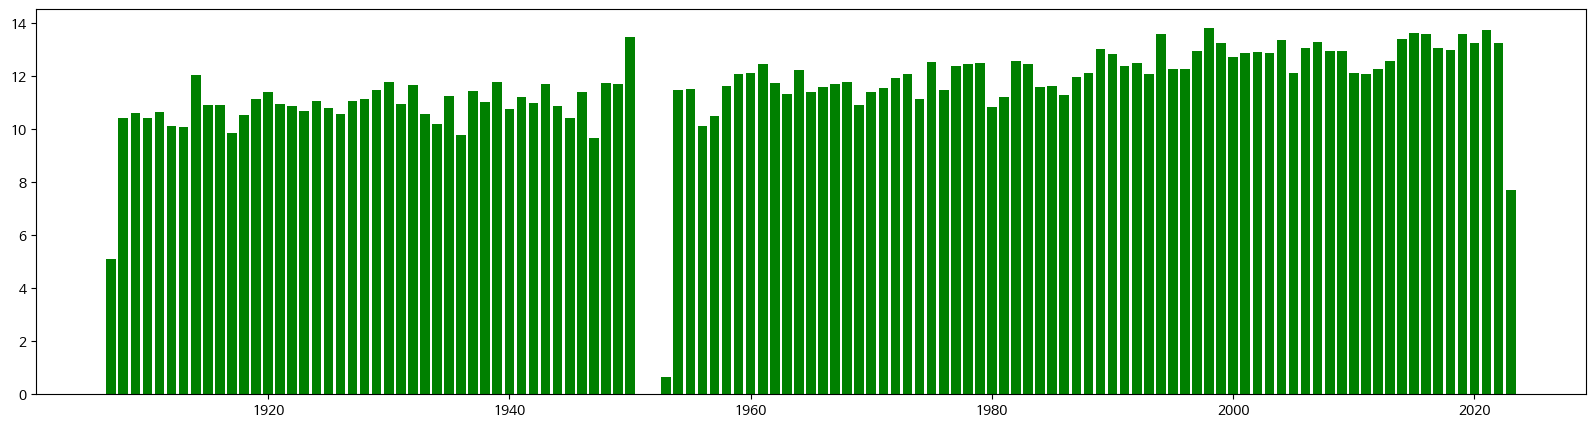

In [ ]:
# x축이 년도, y축이 해당 년도의 평균기온인 파란색 막대그래프 그려보기



#### x축 눈금 조정하기



```
plt.xticks(눈금위치, 변경할 눈금 값)  

plt.figure(dpi=100, figsize=(20,5))

plt.bar(data_year.index,data_year['평균기온(℃)'] , color='blue')
plt.xticks(data_year.index, data_year.index, rotation=90)
plt.show()
```



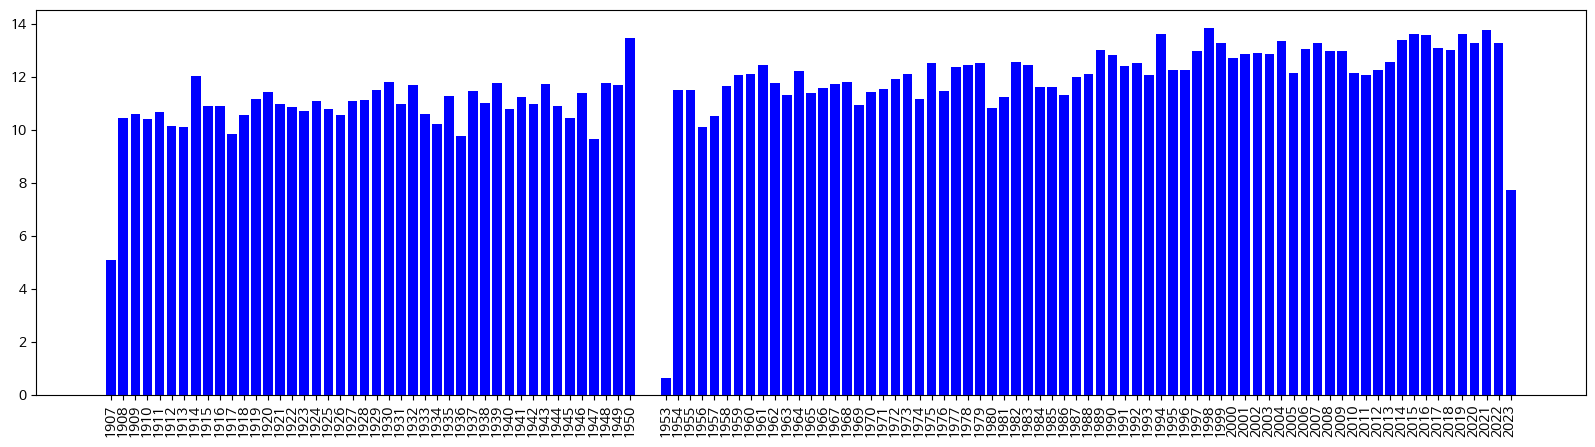

In [ ]:
# 그래프 사이즈 : 가로는 20, 세로는 5



## ❓ 1951년부터 1953년 사이에 무슨 일이 있었던 걸까?
 --> ❗ ChatGPT에 물어보자!

In [ ]:
# 폰트 사이즈 변경




```
# 행 삭제
data.drop(['컬럼명'], axis= 'columns')

# 열 삭제
data.drop(['행이름'], axis= 'rows')
```



```
data_year=data_year.drop([1907, 1953, 2023], axis= 'rows')
```

In [ ]:
# 다음 년도를 삭제해보자 : 1907, 1951, 1952, 1953, 2023



```
plt.figure(dpi=100, figsize=(20,5))

plt.bar(data_year.index,data_year['평균기온(℃)'] , color='blue')
plt.xticks(data_year.index, data_year.index, rotation=90)
plt.show()
```

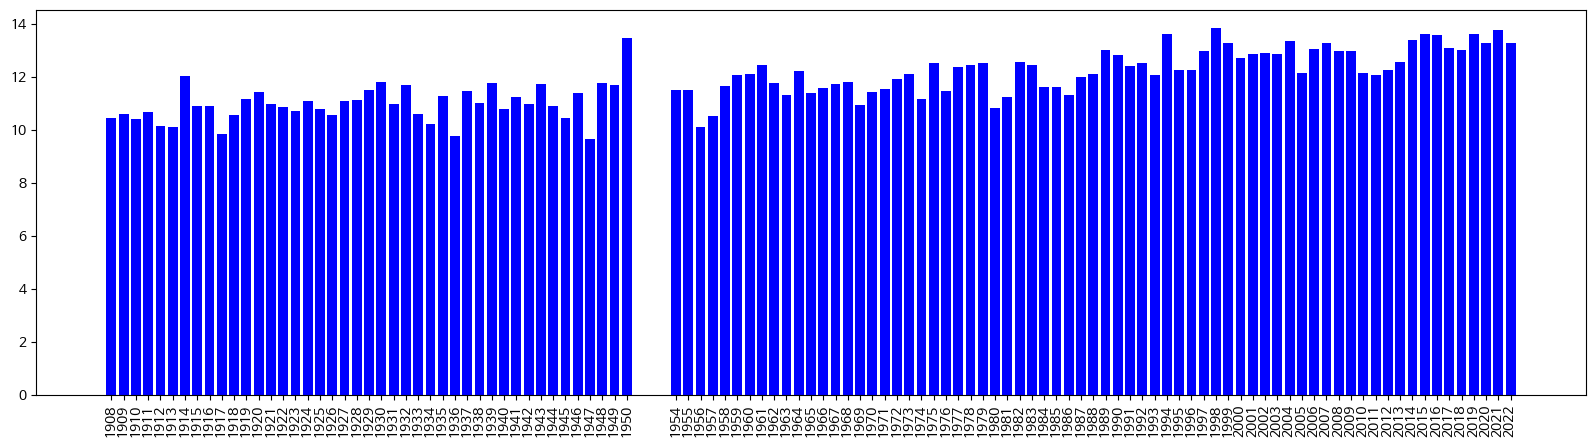

In [ ]:
# 완성된 그래프 확인




# 📊 seaborn으로 데이터 분석하기

> seaborn은 matplotlib를 기반으로 만들어진 데이터를 시각화할 수 있는 파이썬 라이브러리이다.

```
import seaborn as sns
sns.heatmap(data_year)
plt.show()
```


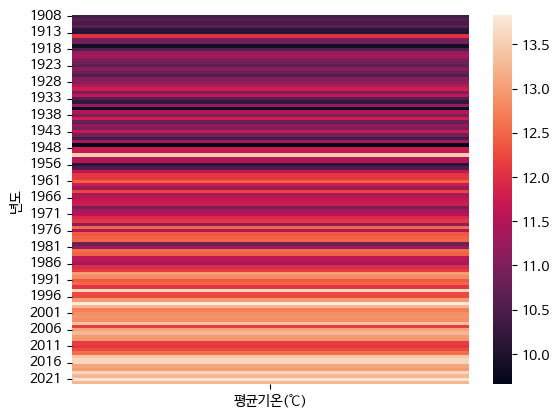

```
daya_year_ts=data_year.transpose()
daya_year_ts
```

In [ ]:
# data_year의 행/열 전환




년도,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
평균기온(℃),10.427322,10.608767,10.412055,10.654795,10.12377,10.086027,12.029041,10.898356,10.911202,9.85863,...,12.563562,13.400274,13.621918,13.592896,13.077747,13.002466,13.598904,13.271858,13.752055,13.259066


```
plt.figure(dpi=100, figsize=(20,5))

sns.heatmap(daya_year_ts, cmap='coolwarm')

plt.show()
```

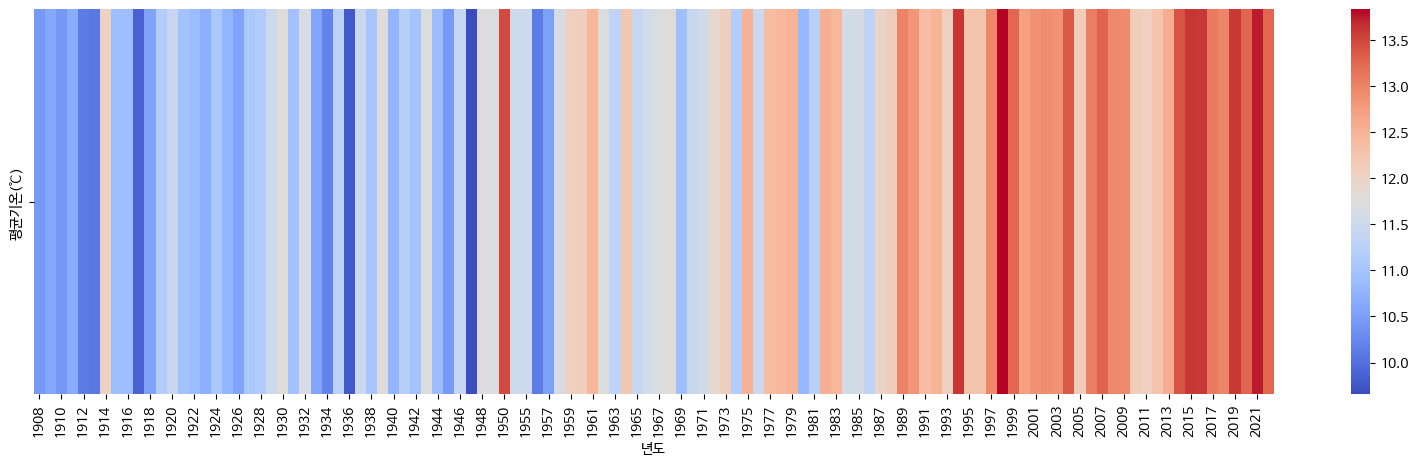

```
plt.figure(dpi=100, figsize=(20,5))

sns.regplot(x=data_year.index, y=data_year['평균기온(℃)'], color='indigo') #음영이 좁을 수록 정확도가 높은 것임

plt.show()
```

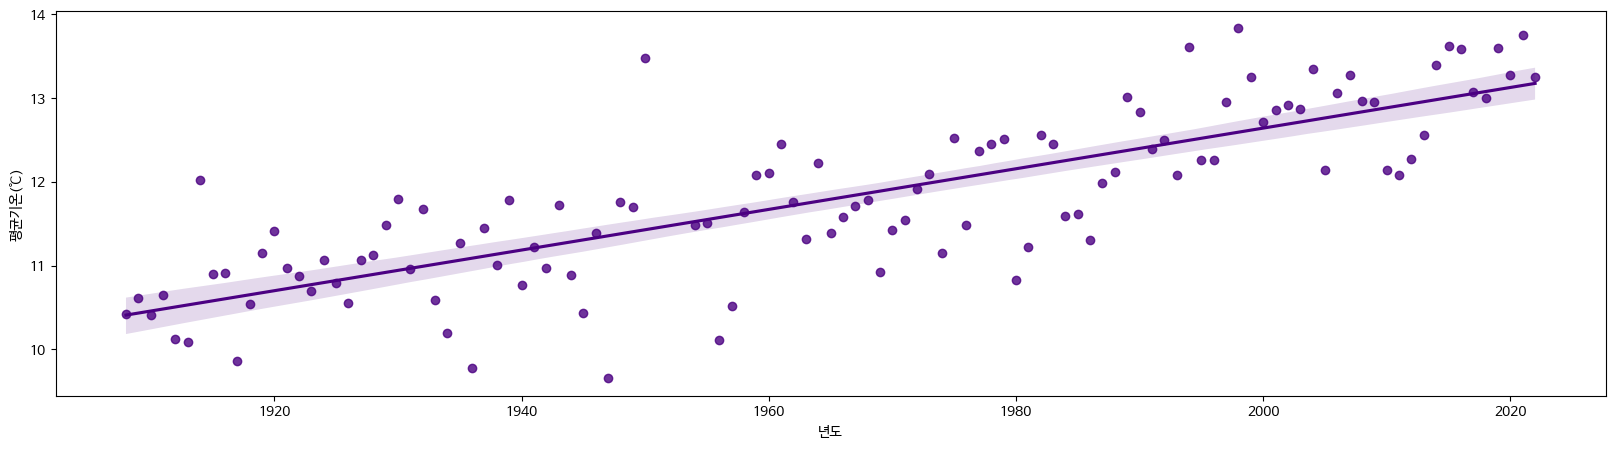

In [ ]:
# 회귀선이 나타나는 sns.regplot()로도 표현해보자




## ❓ 우리나라 평균기온이 급격하게 증가한 년도는 언제일까?

heatmap을 참고해보자!
```
data_year.index <=1959
```

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

```
data_year.loc[1960]
```

In [ ]:
# 데이터프레임.loc[] : 원하는 행만 선택


평균기온(℃)    12.104645
Name: 1960, dtype: float64

```
data_year1=data_year.loc[data_year.index <=1959]
data_year2=data_year.loc[data_year.index >1959]
```

In [ ]:
# 데이터프레임.loc[조건] : 조건을 충족하는 행만 선택



```
plt.figure(dpi=100, figsize=(20,5))
sns.regplot(x=data_year1.index, y=data_year1['평균기온(℃)'], color='indigo') #음영이 좁을 수록 정확도가 높은 것임
sns.regplot(x=data_year2.index, y=data_year2['평균기온(℃)'], color='crimson') #음영이 좁을 수록 정확도가 높은 것임
plt.show()
```

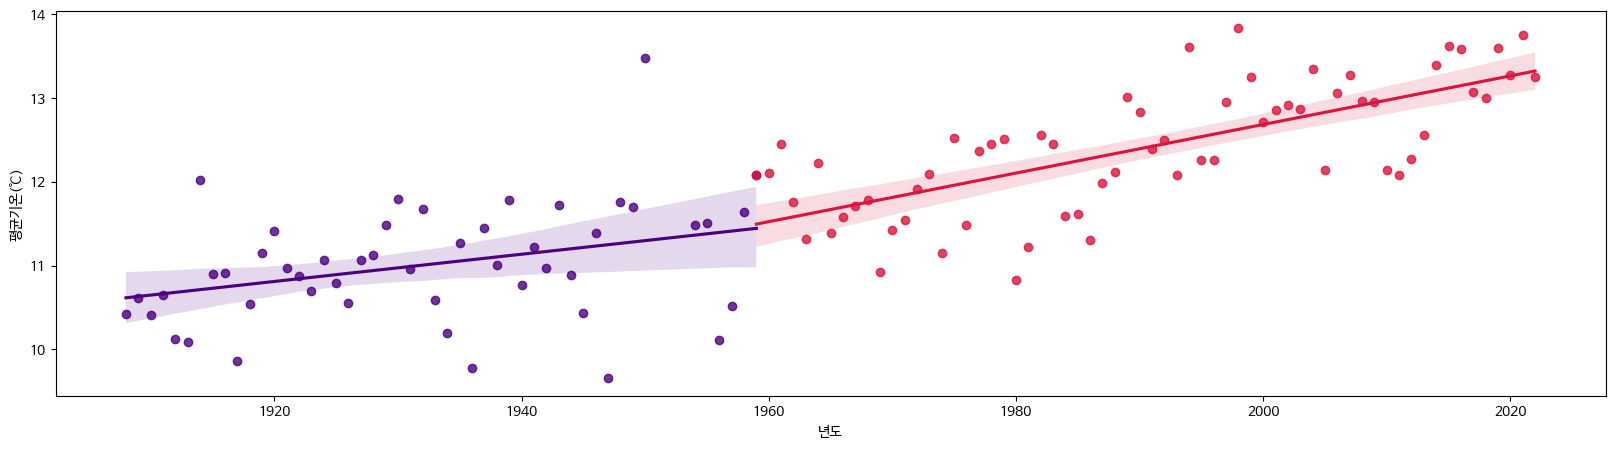

In [ ]:
# 두 개의 regplot을 한 좌표평면에 합쳐서 그리기




? 왜 선이 이어지지 않을까?